In [1]:
#naive approach

import pandas as pd
import numpy as np
from time import time as t
import matplotlib.pyplot as plt
import math
# 

In [17]:
# traces = np.fromfile('data/traces_attack_hw3/traces_attack_int16.npy',dtype='int16')
traces = np.load('data/traces_attack_hw3/traces_attack_int16.npy')[:,:5000]
plain_text = np.load('data/traces_attack_hw3/textin_attack.npy')
# plaintext_10000_16 = plain_text

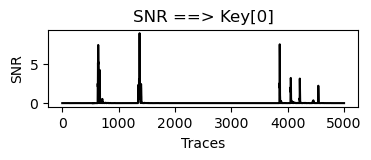

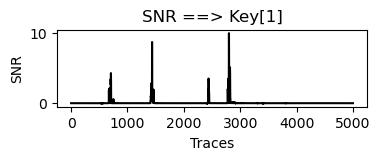

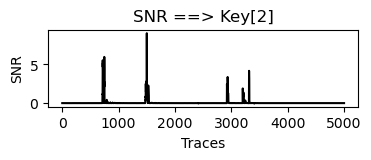

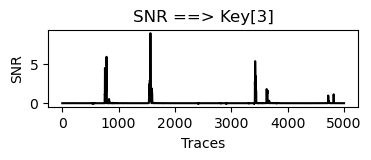

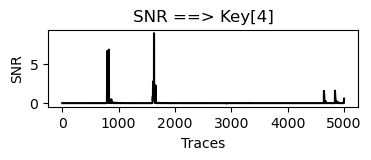

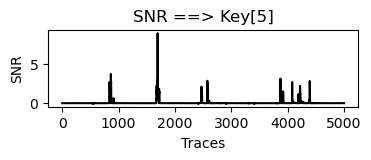

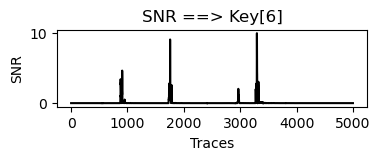

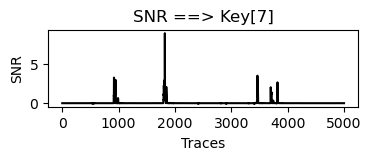

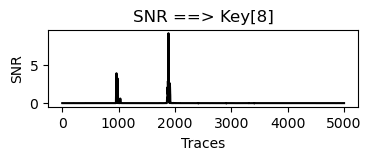

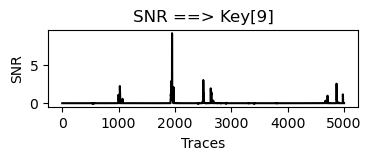

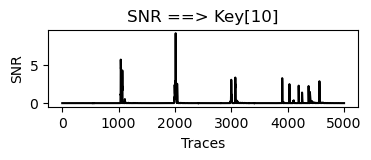

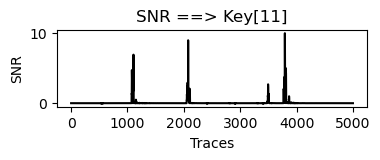

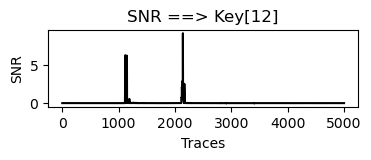

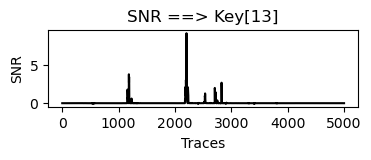

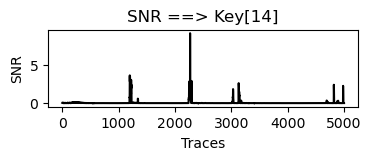

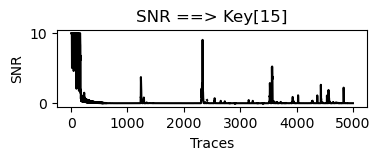

In [120]:
for byte in range(16):
    traces_mean =[]
    traces_var =[]
    for byte_256 in range(256):
        get_byte_indexes = traces[np.where(plain_text[:,byte] == byte_256)]#getting the indices of 0-255 bytes from Plain_text
        traces_mean.append(np.mean(get_byte_indexes,axis=0))#computing the means 
        traces_var.append(np.var(get_byte_indexes,axis=0, where = get_byte_indexes!=0))#computing the variances

    traces_mean = np.array(traces_mean)
    traces_var = np.array(traces_var)

    traces_var_mean = np.var(traces_mean, where=traces_var_mean != 0,axis=0)#numerator
    traces_mean_var = np.mean(traces_var, axis = 0)#denominator
    traces_mean_var[traces_mean_var==0]=np.inf
    snr = np.divide(traces_var_mean,traces_mean_var) #SNR


    #graph
    fig, ax = plt.subplots(figsize=(4, 1))
    snr[snr>10] = 10
    ax.plot(snr, 'black')
    ax.set_title(f"SNR ==> Key[{byte}]")
    ax.set_xlabel('Traces')
    ax.set_ylabel('SNR')
    plt.show()